In [94]:
# %pip install keras
# %pip install tensorflow
# %pip install image_dataset_loader

import keras
import os
from keras.models import *
from keras.layers import *
from keras.datasets import cifar10
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.utils import *
from keras.applications.vgg16 import VGG16
from image_dataset_loader import load


train_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/train/")
validation_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/val/")
test_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/test/")


# train_data_dir = os.path.dirname("output_path/train/")
# validation_data_dir = os.path.dirname("output_path/val/")
# test_data_dir = os.path.dirname("output_path/test/")

In [95]:

img_width, img_height = 220, 380
batch_size = 2

datagenerate_train = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)
                                
train_generator = datagenerate_train.flow_from_directory(train_data_dir,
                                                target_size=(img_width,img_height),
                                                 batch_size=batch_size,
                                                 #subset="training",
                                                 class_mode='categorical')

datagenerate_validation = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

validation_generator = datagenerate_validation.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width,img_height),
                                                        batch_size=batch_size,
                                                        #subset="validation",
                                                        class_mode='categorical')


print(train_generator)
print(validation_generator)
# print(test_generator)

Found 709 images belonging to 7 classes.
Found 204 images belonging to 7 classes.


# Model Training


In [96]:
# def define_VGGmodel():

#     model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))

#     for layer in model.layers:
#         layer.trainable = False

#     flat1 = Flatten()(model.layers[-1].output)

#     class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)

#     output = Dense(7, activation='softmax')(class1)

#     model = Model(inputs=model.inputs, outputs=output)

#     #opt = SGD(lr=0.001, momentum=0.9)

#     model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
#     return model

# model = define_VGGmodel()
# model.summary()

In [97]:
# from keras import models
# from keras import layers

# model = Sequential([
#     layers.Rescaling(1./255, input_shape=(220, 389, 3)),
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(7, activation='softmax')
# ])
# model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()


In [98]:
from keras import models
from keras import layers

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(220, 380, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
# add classifier (dense layers)
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(7, activation='softmax'))
# compile model
# opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 220, 380, 32)      896       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 110, 190, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 110, 190, 64)      18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 55, 95, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 55, 95, 128)       73856     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 27, 47, 128)    

In [99]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [100]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator, validation_steps=len(validation_generator), epochs=20, verbose=1, shuffle=False, callbacks=[earlystopping])

Epoch 1/20
355/355 [==============================] - 63s 177ms/step - loss: 1.8855 - accuracy: 0.2468 - val_loss: 1.5792 - val_accuracy: 0.3775
Epoch 2/20
355/355 [==============================] - 60s 169ms/step - loss: 1.2394 - accuracy: 0.5289 - val_loss: 0.9792 - val_accuracy: 0.6324
Epoch 3/20
355/355 [==============================] - 60s 170ms/step - loss: 0.5774 - accuracy: 0.8138 - val_loss: 0.8701 - val_accuracy: 0.7598
Epoch 4/20
355/355 [==============================] - 60s 169ms/step - loss: 0.2286 - accuracy: 0.9309 - val_loss: 0.9223 - val_accuracy: 0.7647
Epoch 5/20
355/355 [==============================] - 60s 170ms/step - loss: 0.0719 - accuracy: 0.9831 - val_loss: 1.1027 - val_accuracy: 0.7549
Epoch 6/20
355/355 [==============================] - 60s 169ms/step - loss: 0.1134 - accuracy: 0.9647 - val_loss: 1.3547 - val_accuracy: 0.7794
Epoch 7/20
355/355 [==============================] - 60s 170ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 1.3312 - val_ac

In [101]:
print(history.history)

{'loss': [1.885510802268982, 1.239437222480774, 0.5773573517799377, 0.22864167392253876, 0.0719105675816536, 0.11341135948896408, 0.017506780102849007, 0.015230754390358925], 'accuracy': [0.24682651460170746, 0.5289139747619629, 0.8138222694396973, 0.9308885931968689, 0.9830747246742249, 0.9647390842437744, 0.994358241558075, 0.995768666267395], 'val_loss': [1.5791566371917725, 0.9792411923408508, 0.8701225519180298, 0.9223240613937378, 1.1026819944381714, 1.3547059297561646, 1.3312314748764038, 1.4063256978988647], 'val_accuracy': [0.37745097279548645, 0.6323529481887817, 0.7598039507865906, 0.7647058963775635, 0.7549019455909729, 0.779411792755127, 0.7843137383460999, 0.7941176295280457]}


# Diagnostic plot

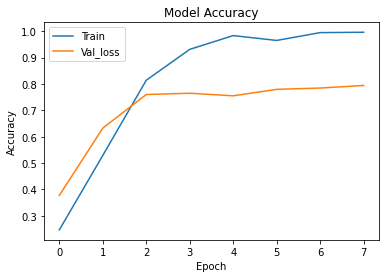

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val_loss'], loc='upper left')
plt.show()

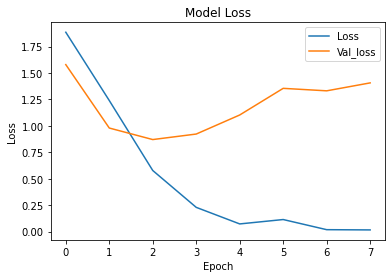

In [103]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

In [104]:
print('Validation image - evaluation')
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('accuracy score: ', acc*100 )

Validation image - evaluation
102/102 [==============================] - 4s 35ms/step - loss: 0.8701 - accuracy: 0.7598
accuracy score:  75.98039507865906


In [105]:
# print('Test image - evaluation')
# _, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
# print('accuracy score: ', acc*100 )

# Testing

In [106]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v1/train-test/")

datagenerate_test = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

test_generator = datagenerate_test.flow_from_directory(test_data_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                #subset="validation",
                                                class_mode='categorical')

Found 107 images belonging to 7 classes.


In [107]:
print('Test image - evaluation')
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('accuracy score: ', acc*100 )

Test image - evaluation
54/54 [==============================] - 2s 42ms/step - loss: 1.1693 - accuracy: 0.6542
accuracy score:  65.42056202888489


In [108]:

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('accuracy: ', metrics.accuracy_score(y_pred,test_generator.classes))

54/54 [==============================] - 2s 36ms/step
accuracy:  0.1308411214953271


In [109]:
print('Confusion Matrix')
print(confusion_matrix(y_pred, test_generator.classes))

Confusion Matrix
[[2 2 0 3 2 6 1]
 [0 3 2 0 4 2 2]
 [2 2 1 1 2 1 0]
 [2 3 0 0 1 0 1]
 [2 3 2 1 3 2 5]
 [3 5 4 4 4 4 4]
 [3 1 3 1 3 4 1]]


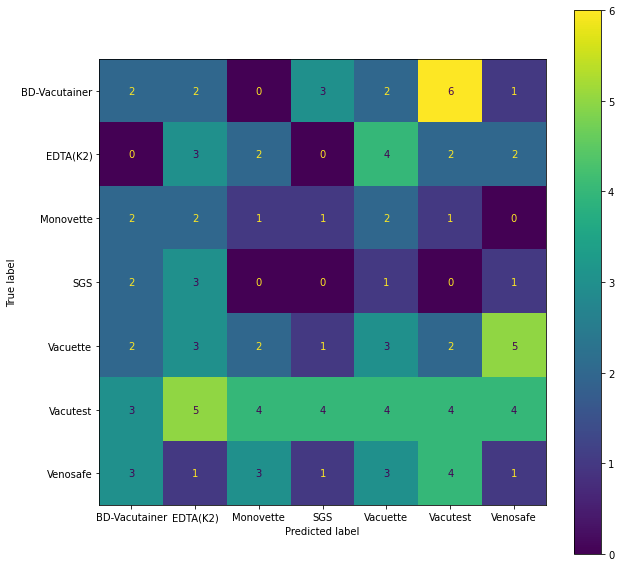

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, test_generator.classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'BD-Vacutainer', 'EDTA(K2)', 'Monovette','SGS', 'Vacuette' , 'Vacutest', 'Venosafe'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmd.plot(ax=ax)

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy Score :', accuracy_score(y_pred, test_generator.classes)) 
print ('Report : ')
target_names = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe']
print (classification_report(y_pred, test_generator.classes, target_names=target_names)) 

Accuracy Score : 0.1308411214953271
Report : 
               precision    recall  f1-score   support

BD-Vacutainer       0.14      0.12      0.13        16
     EDTA(K2)       0.16      0.23      0.19        13
    Monovette       0.08      0.11      0.10         9
          SGS       0.00      0.00      0.00         7
     Vacuette       0.16      0.17      0.16        18
     Vacutest       0.21      0.14      0.17        28
     Venosafe       0.07      0.06      0.07        16

     accuracy                           0.13       107
    macro avg       0.12      0.12      0.12       107
 weighted avg       0.14      0.13      0.13       107



The confusion matrix has show the 